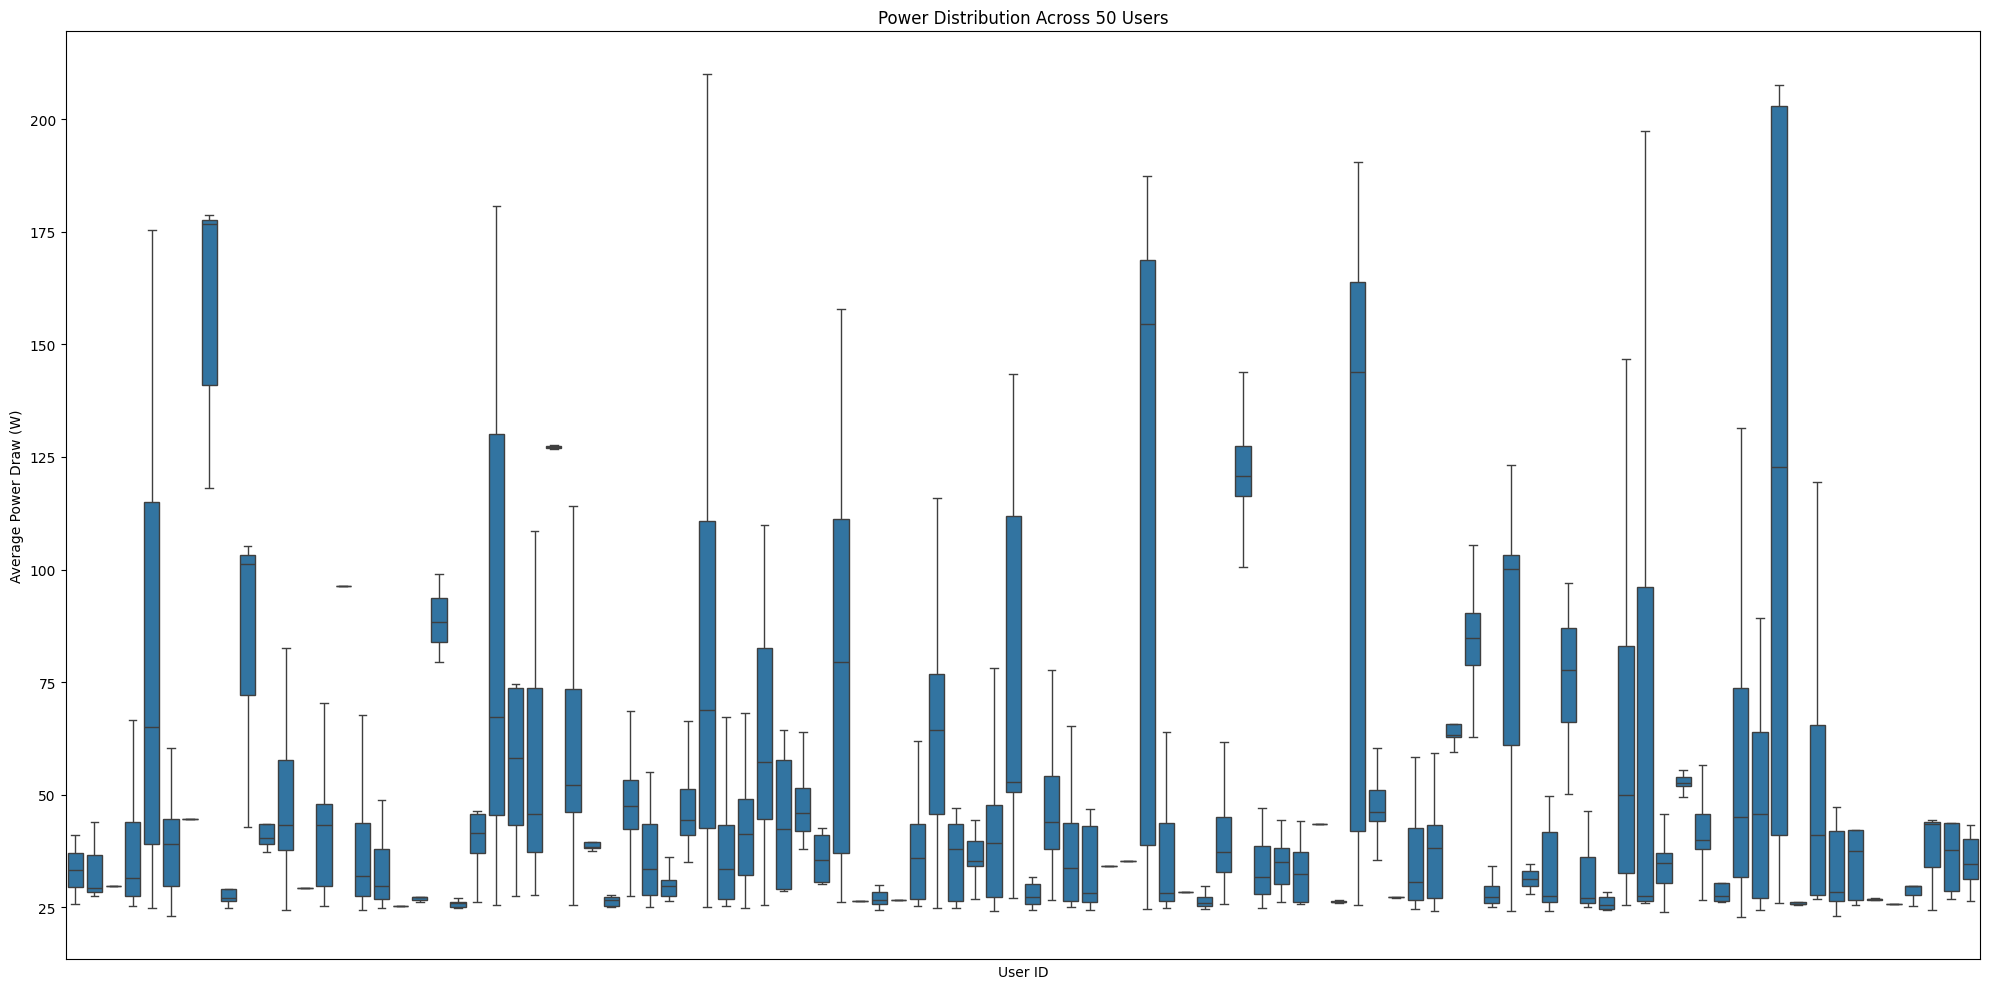

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

summary_csv_file = '/scratch/cognit/workload_summary.csv'
summary_df = pd.read_csv(summary_csv_file)

selected_users = summary_df['id_user'].drop_duplicates().sample(n=100, random_state=42)
filtered_summary_df = summary_df[summary_df['id_user'].isin(selected_users)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=filtered_summary_df, x='id_user', y='avg_power', showfliers=False)

plt.xticks([], [])
plt.title('Power Distribution Across 50 Users')
plt.xlabel('User ID')
plt.ylabel('Average Power Draw (W)')
plt.tight_layout()
plt.show()

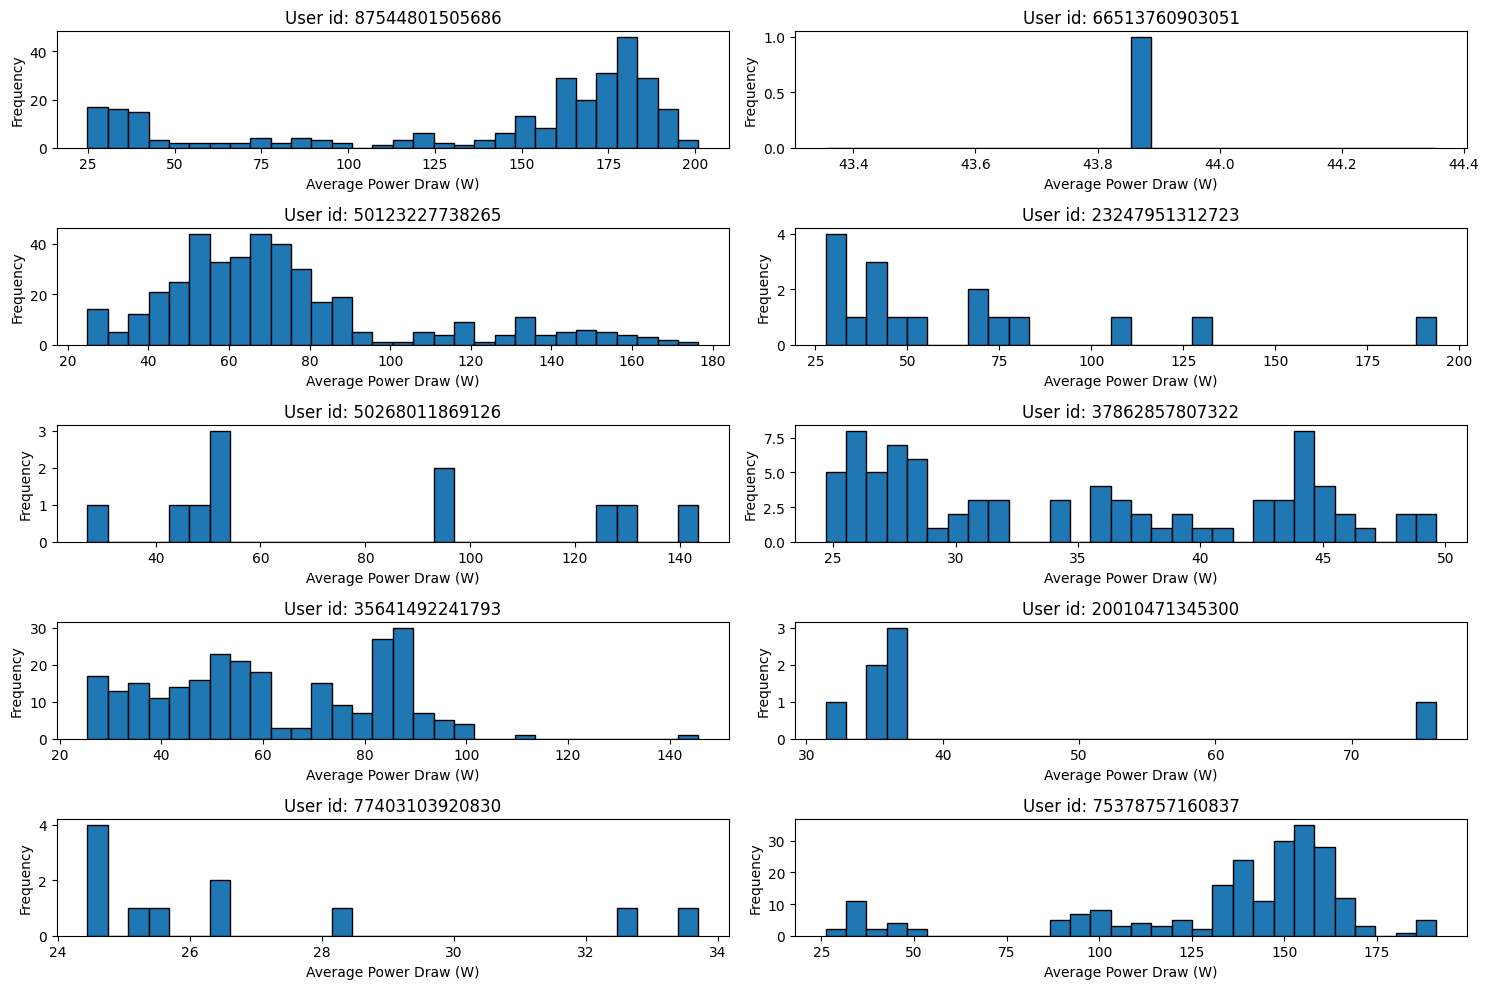

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

summary_csv_file = '/scratch/cognit/workload_summary.csv'  # Replace with the actual path to your workload summary CSV file
summary_df = pd.read_csv(summary_csv_file)

user_avg_power = summary_df.groupby('id_user')['avg_power'].mean().reset_index()

random_users = user_avg_power['id_user'].sample(n=10).tolist()
random_power_draw_data = {user: summary_df[summary_df['id_user'] == user]['avg_power'].tolist() for user in random_users}

plt.figure(figsize=(15, 10))

for idx, (user, power_data) in enumerate(random_power_draw_data.items()):
    plt.subplot(5, 2, idx + 1)
    plt.hist(power_data, bins=30, edgecolor='black')
    plt.title(f'User id: {user}')
    plt.xlabel('Average Power Draw (W)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()